In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
import geopandas as gpd

In [3]:
#Load dataset into dataframe
df = pd.read_csv('NYPD_Arrest_Data__Year_to_Date_cleaned.csv')

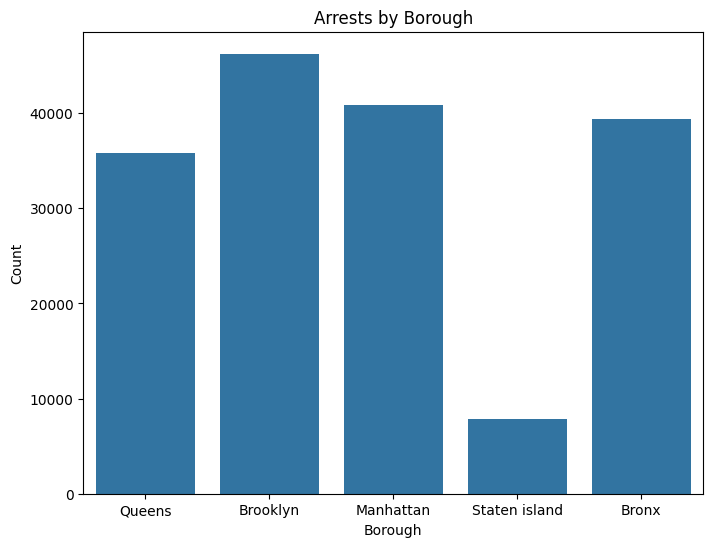

Borough
Brooklyn         46256
Manhattan        40831
Bronx            39435
Queens           35767
Staten island     7896
Name: count, dtype: int64


In [4]:
plt.figure(figsize=(8,6))
sns.countplot(x='Borough', data=df)
plt.title('Arrests by Borough')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.show()
arrests_by_borough = df['Borough'].value_counts()

print(arrests_by_borough)

#The above chart shows that Brooklyn has the highest number of arrests, followed by Manhattan, Queens, Bronx, and Staten Island.

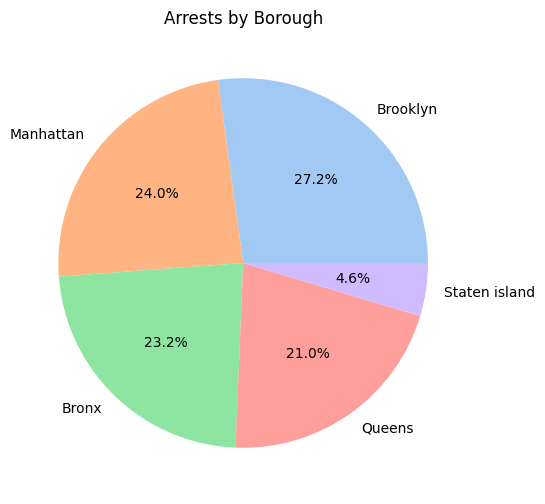

In [16]:
#The below pie chart shows that Brooklyn has the highest number of arrests, followed by Manhattan, Queens, Bronx, and Staten Island.
plt.figure(figsize=(8,6))
plt.pie(arrests_by_borough, labels=arrests_by_borough.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Arrests by Borough')
plt.show()

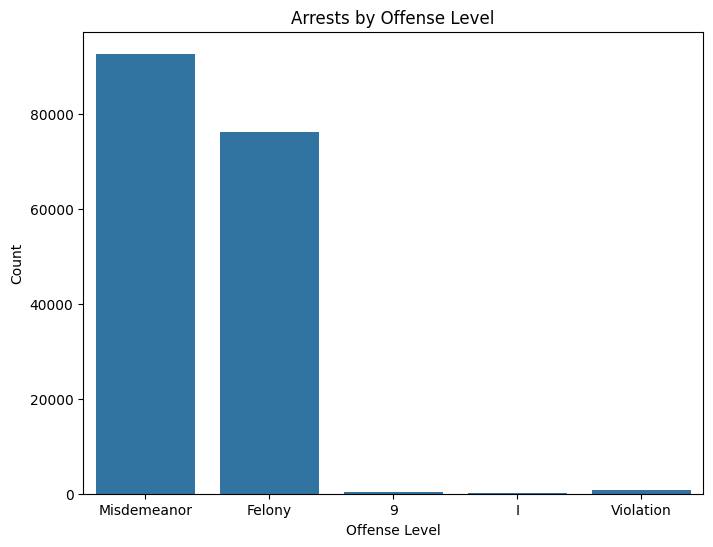

Offense Level
Misdemeanor    92638
Felony         76086
Violation        780
9                441
I                240
Name: count, dtype: int64


In [6]:
plt.figure(figsize=(8,6))
sns.countplot(x='Offense Level', data=df)
plt.title('Arrests by Offense Level')
plt.xlabel('Offense Level')
plt.ylabel('Count')
plt.show()
arrests_by_offense = df['Offense Level'].value_counts()

print(arrests_by_offense)

#The above chart shows that most arrests are for misdemeanor offenses, followed by violations and then felonies.

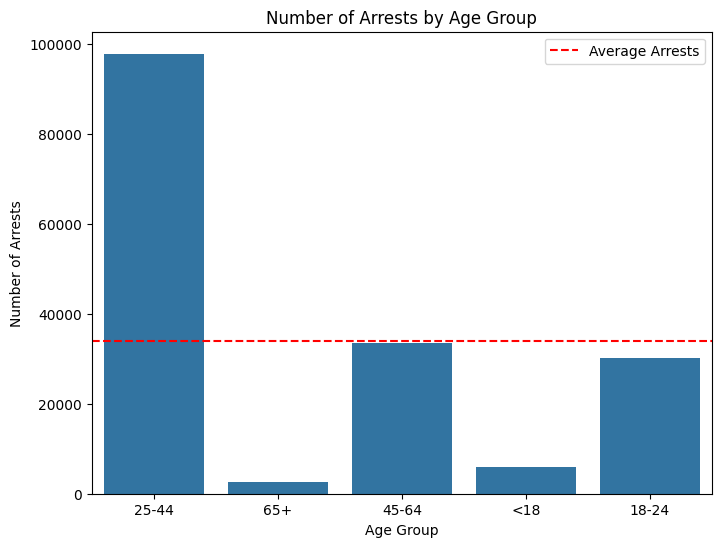

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Age Group')
plt.title('Number of Arrests by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Arrests')
# Calculate the mean number of arrests
mean_arrests = df['Age Group'].value_counts().mean()
# Plot a horizontal line at the mean value
plt.axhline(mean_arrests, color='r', linestyle='--', label='Average Arrests')
plt.legend()
plt.show()

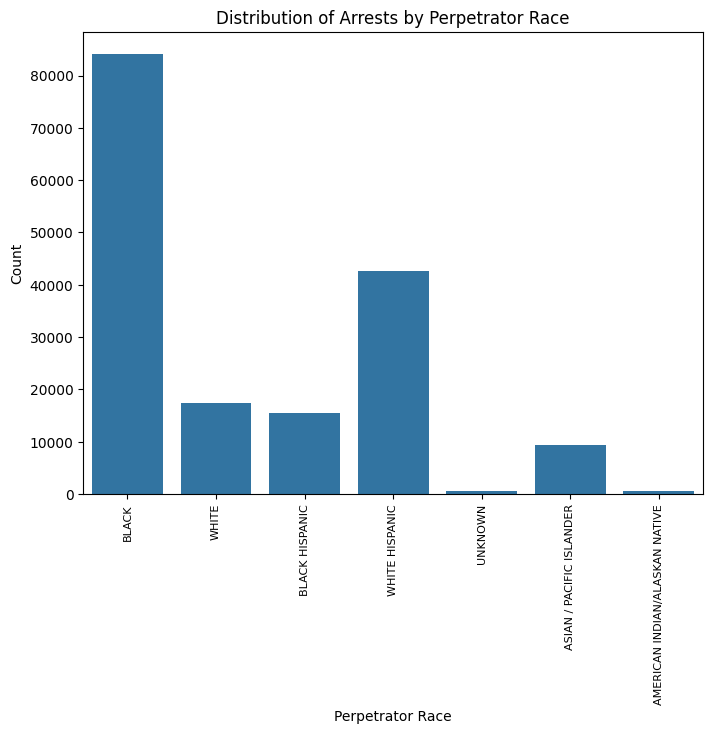

In [13]:
# Visualize the distribution of arrest counts by race
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Perpetrator Race')
plt.title('Distribution of Arrests by Perpetrator Race')
plt.xlabel('Perpetrator Race')
plt.ylabel('Count')
plt.xticks(fontsize=8, rotation=90)
plt.show()

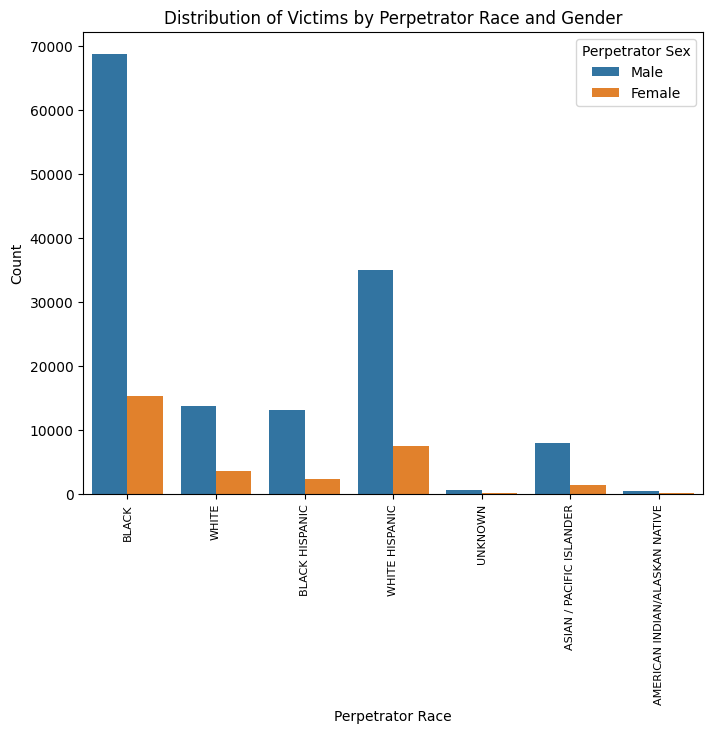

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df[(df['Perpetrator Sex'] == 'Female') | (df['Perpetrator Sex'] == 'Male')], x='Perpetrator Race', hue='Perpetrator Sex', hue_order=['Male', 'Female'])
plt.title('Distribution of Victims by Perpetrator Race and Gender')
plt.xlabel('Perpetrator Race')
plt.ylabel('Count')
plt.xticks(fontsize=8, rotation=90)
plt.legend(title='Perpetrator Sex', loc='upper right')
plt.show()


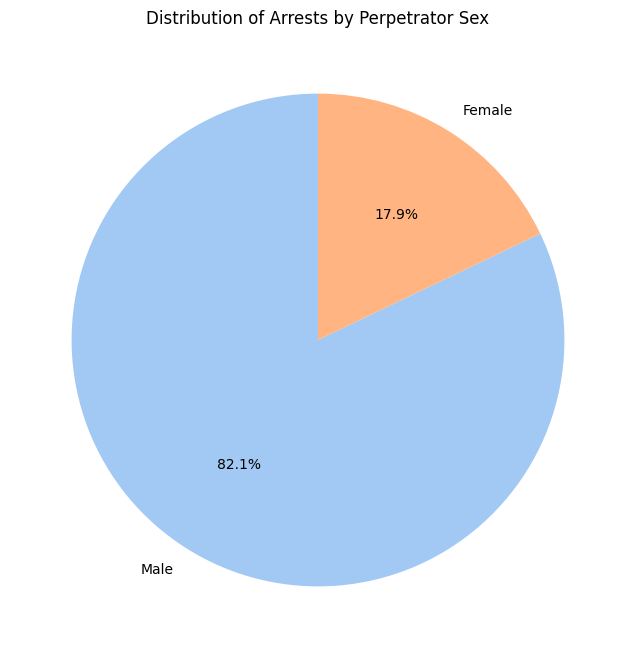

In [15]:
plt.figure(figsize=(8, 8))

# Count the occurrences of each category in 'Perpetrator Sex' column
sex_counts = df['Perpetrator Sex'].value_counts()

# Plotting a pie chart
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))

# Adding a title
plt.title('Distribution of Arrests by Perpetrator Sex')

# Display the pie chart
plt.show()

/var/folders/zn/frtcx_8d3mg0lvjd20vlbdh00000gn/T/ipykernel_71091/3763414336.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'nybb' data from the geodatasets package.

from geodatasets import get_path
path_to_file = get_path('nybb')

  nyc_map = gpd.read_file(gpd.datasets.get_path('nybb'))


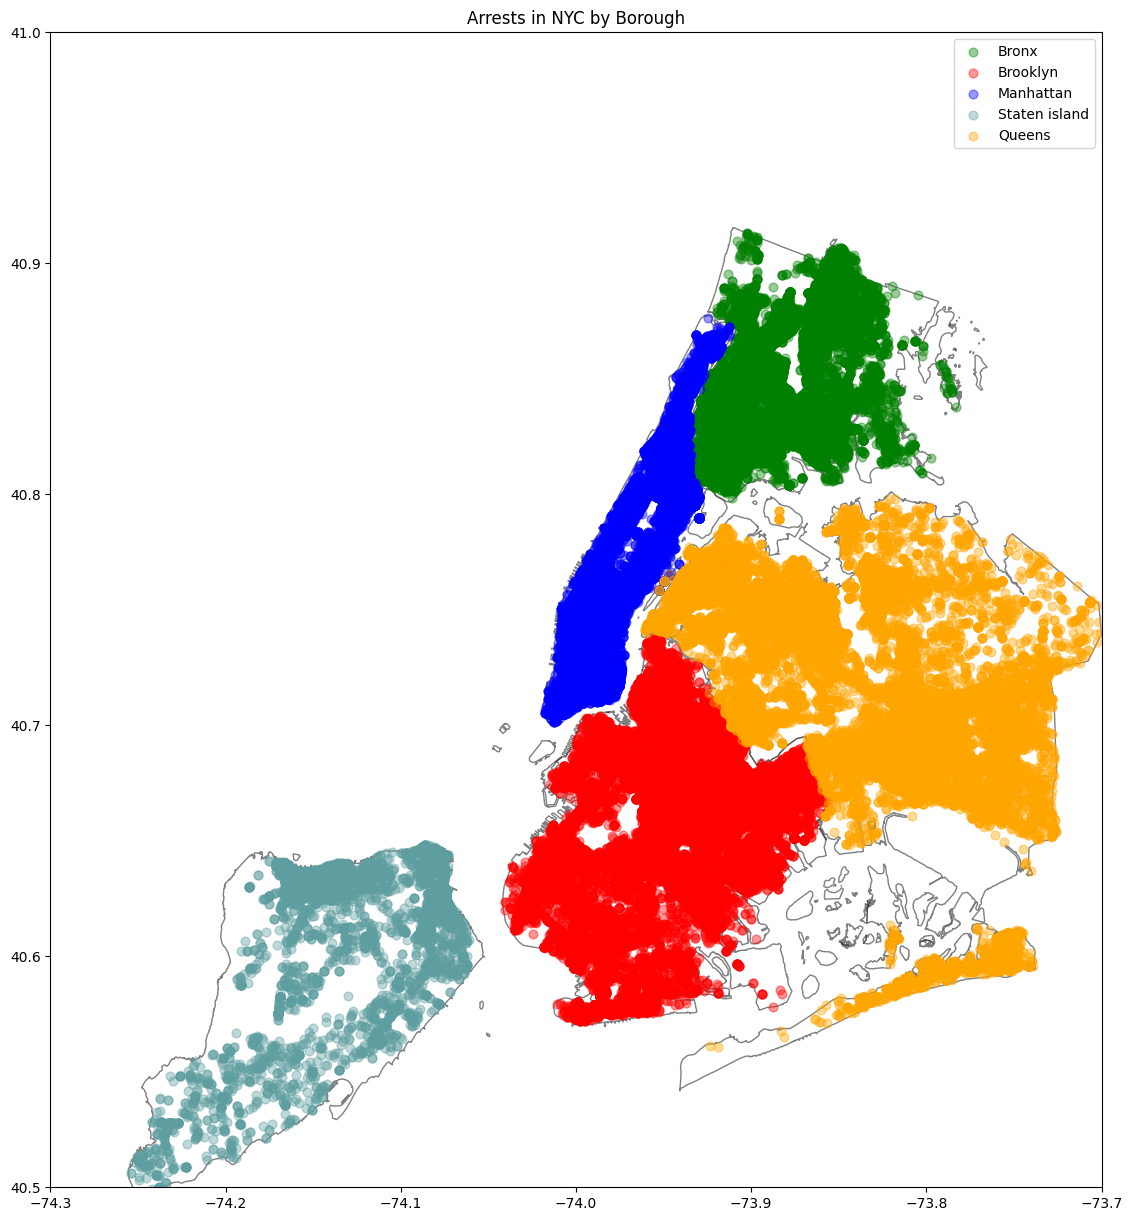

In [39]:
# Load shapefile and filter by borough
shp = gpd.read_file('shape file/geo_export_a8dbf47e-367d-47ea-a7b7-13c34bbbf683.shp')
shp = shp.set_crs("EPSG:4326", allow_override=True)

# Now, you can use to_crs
shp = shp.to_crs("EPSG:4326")
# Load map of New York City
nyc_map = gpd.read_file(gpd.datasets.get_path('nybb'))
nyc_map = nyc_map.to_crs("EPSG:4326")
#Set crs
crs = "EPSG:4326"

# Plot the data on the map
geo_df=gpd.GeoDataFrame(df,crs=crs,geometry=gpd.points_from_xy(df["Longitude"], df["Latitude"]))

fig,ax=plt.subplots(figsize=(15,15))
nyc_map.plot(ax=ax, alpha=0.5, color='white', edgecolor='black')

geo_df[geo_df['Borough']=="Bronx"].plot(ax=ax,markersize=40, alpha=0.4,color="green", label="Bronx")
geo_df[geo_df['Borough']=="Brooklyn"].plot(ax=ax,markersize=40, alpha=0.4,color="red", label="Brooklyn")
geo_df[geo_df['Borough']=="Manhattan"].plot(ax=ax,markersize=40, alpha=0.4,color="blue", label="Manhattan")
geo_df[geo_df['Borough']=="Staten island"].plot(ax=ax,markersize=40, alpha=0.4,color="cadetblue", label="Staten island")
geo_df[geo_df['Borough']=="Queens"].plot(ax=ax,markersize=40, alpha=0.4,color="orange", label="Queens")


# Set the x and y limits to zoom in on the desired area
ax.set_xlim(-74.3, -73.7)
ax.set_ylim(40.5, 41.0)

# Add a title
ax.set_title("Arrests in NYC by Borough")

plt.legend()
plt.show()